<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="200" height="200"><br>
</center>

# Chapter.9 텍스트를 위한 인공 신경망

## 09-1 순차 데이터와 순차 신경망

### - 순차 데이터

순차 데이터는 텍스트나 시계열 데이터와 같이 순서에 의미가 있는 데이터를 말한다. 예를 들면 일별 온도를 기록한 데이터에서 날짜 순서를 뒤죽박죽 섞는다면 내일의 온도를 쉽게 예상하기 어렵다. 지금까지 우리가 보았던 데이터는 순서와는 상관이 없었다. 예를 들어 패션 MNIST 데이터를 생각해보자. 이 데이터를 신경망 모델에 전달할 때 샘플을 랜덤하게 섞은 후 훈련 세트와 검증 세트로 나누었다. 즉 샘플의 순서는 상관이 없었다. 심지어 골고루 섞는 편이 결과가 더 좋았다.

이 장에서 사용하려는 댓글, 즉 텍스트 데이터는 단어의 순서가 중요한 순차 데이터이다. 이런 데이터는 순서를 유지하며 신경망에 주입해야 한다.따라서 순차 데이터를 다룰 때는 이전에 입력한 데이터를 기억하는 기능이 필요하다. 예를 들어 '별로지만 추천해요' 에서 '추천해요'가 입력될 때 '별로지만'을 기억하고 있어야 이 댓글을 무조건 긍정적이라고 판단하지 않을 것이다.

완전 연결 신경망이나 합성곱 신경망은 이런 기억 장치가 없다. 하나의 샘플을 사용하여 정방향 계산을 수행하고 나면 그 샘플은 버려지고 다음 샘플을 처리할 때 재사용하지 않는다. 이렇게 입력 데이터의 흐름이 앞으로만 전달되는 신경망을 피드포워드 신경망이라고 한다. 이전에 배웠던 완전 연결 신경망과 합성곱 신경망이 모두 피드포워드 신경망이다.

신경망이 이전에 처리했던 샘플을 다음 샘플을 처리하는데 재사용하기 위해서는 이렇게 데이터 흐름이 앞으로만 전달 되어서는 안된다. 다음 샘플을 위해 이전 데이터가 신경망 층에 순환될 필요가 있다.

### - 순환 신경망

순환 신경망은 일반적인 완전 연결 신경망과 거의 비슷하다. 완전 연결 신경망에 이전 데이터의 처리 흐름을 순환하는 고리 하나만 추가하면 된다. 순환 신경망에서는 '이전 샘플에 대한 기억을 가지고 있다'고 종종 말한다. 이렇게 샘플을 처리하는 한 단계를 타임스텝이라고 한다. 순환 신경망은 이전 타임스텝의 샘플을 기억하지만 타임스텝이 오래될수록 순환되는 정보는 희미해진다.

순환 신경망에서는 특별히 층을 셀이라고 부른다. 한 셀에는 여러 개의 뉴런이 있지만 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현한다. 또 셀의 출력을 은닉 상태라고 부른다. 일반적으로 은닉층의 활성화 함수로는 하이퍼볼릭 탄젠트 함수가 많이 사용된다. tanh 함수도 S자 모양을 띠기 때문에 종종 시그모이드 함수라고 부르기도 한다. tanh 함수는 시그모이드 함수와 달리 -1 ~ 1 사이의 범위를 가진다. 

다른 신경망과 마찬가지로 순환 신경망에도 활성화 함수가 반드시 필요하다. 순환 신경망의 뉴런은 가중치가 하나 더 있다. 바로 이전 타임스텝의 은닉 상태에 곱해지는 가중치이다. 셀은 입력과 이전 타임스텝의 은닉 상태를 사용하여 현재 타임스텝의 은닉 상태를 만든다.

### - 셀의 가중치와 입출력

순환 신경망의 셀에서 필요한 가중치 크기를 계산해 보자. 복잡한 모델을 배울수록 가중치 개수를 계산해 보면 잘 이해하고 있는지 알 수 있다. 만약 순환층에 입력되는 특성의 개수가 4개이고 순환층의 뉴런이 3개라고 가정해 보자.

wx의 크기는 입력층과 순환층의 뉴런이 모두 연결되기 때문에 가중치 wx의 크기는 4 x 3 = 12가 된다. 그럼 순환층에서 다음 타임스텝에 재사용되는 은닉 상태를 위한 가중치 wh의 크기는 어떻게 될까? 순환층에 있는 첫 번째 뉴런의 은닉 상태가 다음 타임스텝에 재사용될 때 첫 번째 뉴런과 두 번쨰 뉴런, 세 번째 뉴런에 모두 전달된다. 따라서 이 순환층에서 은닉상태를 위한 가중치 wh는 3 x 3 = 9개 이다.

이번에는 파라미터의 개수를 계산해보자. 가중치에 절편을 더하면 된다. 여기엔 각 뉴런마다 하나의 절편이 있다. 따라서 이 순환층은 모두 12 + 9 + 3 = 24개의 모델 파라미터를 가지고 있다.

순환층은 일반적으로 샘플마다 2개의 차원을 가진다. 보통 하나의 샘플을 하나의 시퀀스라고 말한다. 시퀀스 안에는 여러 개의 아이템이 들어있다. 여기에서 시퀀스의 길이가 바로 타임스텝의 길이가 된다. 하나의 샘플은 시퀀스 길이와 단어 표현의 2차원 배열이다. 순환층을 통과하면 1차원 배열로 바뀐다. 이 1차원 배열의 크기는 순환층의 뉴런 개수에 의해 결정된다. 사실 순환층은 기본적으로 마지막 타임스텝의 은닉 상태만 출력으로 내보낸다. 이는 마치 입력된 시퀀스 길이를 모두 읽어서 정보를 마지막 은닉 상태에 압축하여 전달하는 것처럼 볼 수 있다. 이제 순환 신경망이 정보를 기억하는 메모리를 가진다고 표현하는지 이해할 수 있다. 또 순환 신경망이 순차 데이터에 잘 맞는 이유를 파악할 수 있다.

순환 신경망도 완전 연결망이나 합성곱 신경망처럼 여러 개의 층을 쌓을 수 있다. 순환층을 여러 개 쌓았을 때는 셀의 출력은 어떻게 달라질까? 셀의 입력은 샘플마다 타임스텝과 단어 표현으로 이루어진 2차원 배열이어야 한다.

출력층의 구성에 대해 알아보자. 합성곱 신경망과 마찬가지로 순환 신경망도 마지막에는 밀집층을 두어 클래스를 분류한다. 다중 분류일 경우에는 출력층에 클래스 개수만큼 뉴런을 두고 소프트맥스 활성화 함수를 사용한다. 이진 분류일 경우에는 하나의 뉴런을 두고 시그모이드 활성화 함수를 사용한다. 합성곱 신경망과 다른 점은 마지막 셀의 출력이 1차원이기 때문에 Flatten 클래스로 펼칠 필요가 없다. 셀의 출력을 그대로 밀집층에 사용할 수 있다.

## 09-2 순환 신경망으로 IMDB 리뷰 분류하기

## - IMDB 리뷰 데이터셋


IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋이다. 총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있다. 사실 텍스트 자체를 신경망에 전달하지는 않는다. 컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터이다. 앞서 합성곱 신경망에서 이미지를 다룰 때는 특별한 변환을 하지 않았다. 이미지가 정수 픽셀값으로 이루어져 있기 때문이다. 텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유의 정수를 부여하는 것이다.

일반적으로 영어 문장은 모두 소문자로 바꾸고 구둣점을 삭제한 다음 공백을 기준으로 분리한다. 이렇게 분리된 단어를 토큰이라고 부른다. 하나의 샘플은 여러 개의 토큰으로 이루어져 있고 1개의 토큰이 하나의 타임스탬프에 해당한다.

토큰에 할당하는 정수 중에 몇 개는 특정한 용도로 예약되어 있는 경우가 많다. 예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토크을 나타낸다.

실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어 있다. tensorflow.keras.datasets 패키지 아래 imdb 모듈을 임포트하여 이 데이터를 적재해 보자. 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용하자. 이렇게 하기 위해 load_data() 함수의 num_words 매개변수를 500으로 지정한다.

In [1]:
from tensorflow.keras.datasets import imdb
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

/home/jaeyoon89/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jaeyoon89/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jaeyoon89/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jaeyoon89/.local/lib/python3.6/site-packages/tensorflow/python/framework/dty

In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


훈련 세트와 테스트 세트가 각각 25000개의 샘플로 이루어져 있다. 배열이 1차원인게 좀 이상해 보인다. IMDB 리뷰 텍스트는 길이가 제각가이다. 따라서 고정 크기의 2차원 배열에 담기 보다는 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있다.

이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열이다. 다음으로 첫 번째 리뷰의 길이를 출력해 보자.

In [3]:
print(len(train_input[0]))

218


첫 번째 리뷰는 218개의 토큰으로 이루어져 있다. 두 번째 리뷰도 확인해 보자.

In [4]:
print(len(train_input[1]))

189


이제 첫 번째 리뷰에 담긴 내용을 출력해 보자.

In [5]:
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


이번엔 타깃 데이터를 출력해 보자.

In [6]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


해결할 문제는 리뷰가 긍정인지 부정인지를 판단하는 것이다. 그러면 이진 분류 문제로 볼 수 있으므로 타깃값이 0과 1로 나누어 진다.

데이터를 더 살펴보기 전에 훈련 세트에서 검증 세트를 20%를 떼어 놓자. 그러면 훈련 세트의 크기는 20000개로 줄어든다.

In [7]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

이제 훈련 세트에 대해 몇 가지 조사를 해 보자. 먼저 각 리뷰의 길이를 계산해 넘파이 배열에 담자. 이렇게 하는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이 그리고 가장 긴 리뷰의 길이를 확인하기 위함이다.

In [8]:
import numpy as np
lengths = np.array([len(x) for x in train_input])

다음으로 넘파이 mean() 함수와 median() 함수를 사용해 리뷰 길이의 평균과 중간값을 구해보자.

In [9]:
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


그다음 히스토그램으로 표현해 보자.

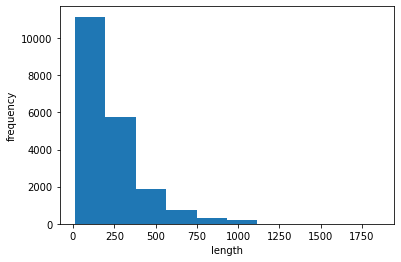

In [10]:
import matplotlib.pyplot as plt
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

대부분의 리뷰 길이는 300 미만이다. 평균이 중간값보다 높은 이유는 오른쪽 끝에 아주 큰 데이터가 있기 때문이다. 리뷰는 대부분 짧아서 이 예제에서는 100개의 단어만 사용하자. 하지만 여전히 100개의 단어보다 작은 리뷰가 있다. 이런 리뷰들의 길이를 100에 맞추기 위해 패딩이 필요하다. 보통 패딩을 나타내는 토큰으로는 0을 사용한다.
케라스의 pad_sequences() 함수를 사용해 train_input의 길이를 100으로 맞추자.

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)

In [12]:
print(train_seq.shape)

(20000, 100)


이제 train_seq에 있는 첫 번째 샘플을 출력해 보자.

In [13]:
print(train_seq[0])

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


이 샘플의 앞뒤에 패딩값 0이 없는 것으로 보아 100보다는 길었을 것 같다. 원래 샘플에 앞이 잘렸는지 뒷부분이 잘렸는지 확인하기 위해 trian_input에 있는 원본 샘플의 끝을 확인해 보자.

In [14]:
print(train_input[0][-10:])

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


뒷부분의 출력값이 정확히 일치한다. 그렇다면 앞부분이 잘렸다는 것을 짐작할 수 있다. pad_sequence() 함수는 기본으로 maxlen보다 긴 시퀀스의 앞부분을 자른다. 이렇게 하는 이유는 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문이다. 이번에는 train_seq에 있는 여섯 번째 샘플을 출력해 보자.

In [15]:
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안되는 걸로 보인다. 역시 같은 이유로 패딩 토큰은 시퀀스의 뒷부분이 아니라 앞부분에 추가된다. 시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치게 되므로 마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않는다. 그러면 이 방식대로 검증 세트의 길이도 100으로 맞추어보자.

In [16]:
val_seq = pad_sequences(val_input, maxlen=100)

### - 순환 신경망 만들기

케라스는 여러 종류의 순환층 클래스를 제공한다. 그중에 가장 간단한 것은 SimpleRNN 클래스이다. IMDB 리뷰 문제는 이진 분류이므로 마지막 출력층은 1개의 뉴런을 가지고 시그모이드 활성화 함수를 사용해야 한다.

In [17]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))
model.add(keras.layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


이 코드는 지금까지 보았던 구성과 매우 비슷하다. 달라진 것은 Dense나 Conv2D 클래스 대신 SimpleRNN 클래스를 사용했다. 첫 번째 매개변수는 사용할 뉴런의 개수로 input_shape에 입력 차원을 (100,500)으로 지정했다. SimpleRNN 클래스의 activation 매개변수의 기본값은 tanh로 하이퍼볼릭 탄젠트 함수를 사용한다. 여기선 기본값 그대로 사용한다.

정수값에 있는 크기 속성을 없애고 각 정수를 고유하게 표현하는 방법은 원-한 인코딩이다. 처음 imdb.load_data() 함수에서 500개 단어만 사용하도록 지정했기 때문에 고유한 단어는 모두 500개이다. 즉 훈련 데이터에 포함될 수 있는 정숫값의 범위는 0에서 499 까지이다. 따라서 이 범위를 원-핫 인코딩으로 표현하려면 배열의 길이가 500이어야 한다. 케라스에서는 keras.utils 패키지 아래에 있는 to_categorical() 함수를 이용하면 원-핫 인코딩된 배열을 반환해 준다.

In [18]:
train_oh = keras.utils.to_categorical(train_seq)

In [19]:
print(train_oh.shape)

(20000, 100, 500)


train_oh의 첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩 되었는지 출력해보자.

In [20]:
print(train_oh[0][0][:12])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


처음 12개의 원소를 출력해 보면 열 한번째 원소가 1인것을 확인할 수 있다.

In [21]:
print(np.sum(train_oh[0][0]))

1.0


열한 번째 원소만 1이고 나머지는 모두 0이어서 원-핫 인코딩된 배열의 값을 모두 더한 결과가 1이 되었다. 같은 방식으로 val_seq도 원-핫 인코딩으로 바꾸어놓자.

In [22]:
val_oh = keras.utils.to_categorical(val_seq)

이제 훈련에 사용할 훈련 세트와 검증 세트가 모두 준비되었다. 앞서 만든 모델의 구조를 출력해보자.

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 4072      
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


### - 순환 신경망 훈련하기

순환 신경망의 훈련은 완전 연결 신경망이나 합성곱 신경망과 크게 다르지 않다. 모델을 만드는 것은 달라도 훈련하는 방법은 모두 같다. 다음 코드처럼 모델을 컴파일하고 훈련하는 전체 구조가 동일하다.

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 25s 1ms/sample - loss: 0.6985 - acc: 0.4954 - val_loss: 0.6975 - val_acc: 0.4998
Epoch 2/100
20000/20000 [==============================] - 15s 750us/sample - loss: 0.6955 - acc: 0.5036 - val_loss: 0.6955 - val_acc: 0.5040
Epoch 3/100
20000/20000 [==============================] - 10s 501us/sample - loss: 0.6935 - acc: 0.5094 - val_loss: 0.6940 - val_acc: 0.5042
Epoch 4/100
20000/20000 [==============================] - 9s 466us/sample - loss: 0.6918 - acc: 0.5192 - val_loss: 0.6926 - val_acc: 0.5136
Epoch 5/100
20000/20000 [==============================] - 10s 477us/sample - loss: 0.6896 - acc: 0.5325 - val_loss: 0.6881 - val_acc: 0.5348
Epoch 6/100
20000/20000 [==============================] - 9s 453us/sample - loss: 0.6815 - acc: 0.5755 - val_loss: 0.6788 - val_acc: 0.5870
Epoch 7/1

이 훈련은 43 번째 에포크에서 조기 종료되었다. 검증 세트에 대한 정확도는 약 80% 정도이다. 매우 뛰어난 성능은 아니지만 감상평을 분류하는 데 어느 정도 성과를 내고 있다고 판단할 수 있다. 그럼 이전 장에서처럼 검증 손실을 그래프로 그려서 훈련 과정을 살펴보자.

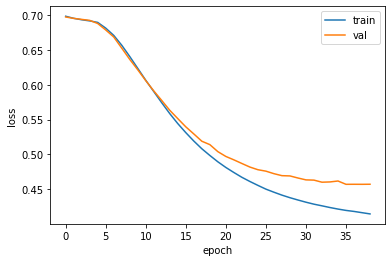

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

훈련 손실은 꾸준히 감소하고 있지만 검증 손실은 대략 스무 번째 에포크에서 감소가 둔해지고 있다. 적절한 에포크에서 훈련을 멈춘 것 같다.

### - 단어 임베딩을 사용하기

순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은 단어 임베딩이다. 단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꾸어 준다. 이런 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있기 때문에 자연어 처리에서 더 좋은 성능을 내는 경우가 많다. 물론 이런 단어 임베딩 벡터를 만드는 층은 이미 준비되어 있다. 케라스에서는 keras.layers 패키지 아래 Embedding 클래스로 임베딩 기능을 제공한다. 이 클래스를 다른 층처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화 되지만 훈련을 통해 데이터에서 좋은 단어 임베딩을 학습한다.

단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것이다. 즉 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용할 수 있다. 

Embbeding 클래스를 SimpleRNN층 앞에 추가한 두 번째 순환 신경망을 만들어 보자.

In [26]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


이 모델의 구조를 출력해 보자.

In [27]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 200       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


Embedding의 모델 훈련 과정은 이전과 동일하다.

In [28]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 6s 312us/sample - loss: 0.6953 - acc: 0.5103 - val_loss: 0.6931 - val_acc: 0.5102
Epoch 2/100
20000/20000 [==============================] - 6s 278us/sample - loss: 0.6811 - acc: 0.5796 - val_loss: 0.6717 - val_acc: 0.6300
Epoch 3/100
20000/20000 [==============================] - 6s 279us/sample - loss: 0.6599 - acc: 0.6622 - val_loss: 0.6538 - val_acc: 0.6798
Epoch 4/100
20000/20000 [==============================] - 6s 285us/sample - loss: 0.6407 - acc: 0.7027 - val_loss: 0.6350 - val_acc: 0.7128
Epoch 5/100
20000/20000 [==============================] - 6s 288us/sample - loss: 0.6216 - acc: 0.7285 - val_loss: 0.6190 - val_acc: 0.7248
Epoch 6/100
20000/20000 [==============================] - 6s 280us/sample - loss: 0.6039 - acc: 0.7444 - val_loss: 0.6104 - val_acc: 0.7268
Epoch 7/100
20000/20000 [==============================] - 6s 280us/sample - loss: 0.5869 - acc: 0.7593 -

출력 결과를 보면 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냈다. 반면에 순환층의 가중치 개수는 훨씬 작고 훈련 세트의 크기도 훨씬 줄어 들었다. 마지막으로 훈련 손실과 검증 손실을 그래프로 출력해 보자.

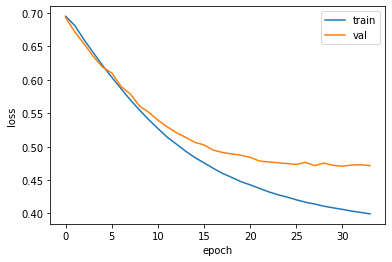

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증 손실이 더 감소되지 않아 훈련이 적절히 조기 종료된 것 같다. 이에 비해 훈련 손실은 계속 감소한다.

## 09-3 LSTM과 GRU 셀

### - LSTM 구조

LSTM은 Long Short-Term Memory의 약자이다. 말 그대로 단기 기억을 오래 기억하기 위해 고안되었다. LSTM은 구조가 복잡하므로 단계적으로 설명하겠다. 하지만 기본 개념은 동일하다. LSTM에는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러 개 가지고 있다. 이런 계산 결과는 다음 타임스텝에 재사용된다. 먼저 은닉상태를 만드는 방법을 알아보자. 은닉 상태는 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉 상태를 만든다. 이때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용한다. 또 tanh 활성화 함수를 통과한 어떤 값과 곱해져서 은닉 상태를 만든다. 

LSTM에는 순환되는 상태가 2개이다. 은닉 상태 말고 셀 상태라고 부르는 값이 또 있다. 은닉 상태와 달리 셀 상태는 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값이다.

셀 상태를 계산하는 과정은 먼저 입력과 은닉 상태를 또 다른 가중치 wf에 곱한 다음 시그모이드 함수를 통과시킨다. 그다음 이전 타임스테의 셀 상태와 곱하여 새로운 셀 상태를 만든다. 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여한다.

### - LSTM 신경망 훈련하기

먼저 이전 절에서처럼 IMDB 리뷰 데이터를 로드하고 훈련 세트와 검증 세트로 나눈다.

In [30]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

/home/jaeyoon89/.local/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:128: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/jaeyoon89/.local/lib/python3.6/site-packages/tensorflow/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


그 다음 케라스의 pad_sequences() 함수로 각 샘플의 길이를 100에 맞추고 부족할 때는 패딩을 추가한다.

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

이제 LSTM 셀을 사용한 순환층을 만들어 보자. 사실 SimpleRnn 클래스를 LSTM 클래스로 바꾸기만 하면 된다.

In [32]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

모델 구조를 출력해 보자.

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 20000 samples, validate on 5000 samples
Epoch 1/100
20000/20000 [==============================] - 13s 653us/sample - loss: 0.6923 - acc: 0.5436 - val_loss: 0.6912 - val_acc: 0.5882
Epoch 2/100
20000/20000 [==============================] - 14s 686us/sample - loss: 0.6897 - acc: 0.6084 - val_loss: 0.6879 - val_acc: 0.6268
Epoch 3/100
20000/20000 [==============================] - 14s 699us/sample - loss: 0.6842 - acc: 0.6470 - val_loss: 0.6801 - val_acc: 0.6638
Epoch 4/100
20000/20000 [==============================] - 14s 713us/sample - loss: 0.6695 - acc: 0.6804 - val_loss: 0.6548 - val_acc: 0.6976
Epoch 5/100
20000/20000 [==============================] - 15s 768us/sample - loss: 0.6111 - acc: 0.7244 - val_loss: 0.5717 - val_acc: 0.7258
Epoch 6/100
20000/20000 [==============================] - 18s 912us/sample - loss: 0.5526 - acc: 0.7391 - val_loss: 0.5447 - val_acc: 0.7444
Epoch 7/100
20000/20000 [==============================] - 18s 914us/sample - loss: 0.5291 - acc: 0

훈련 손실과 검증 손실 그래프를 그려보자.

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

그래프를 보면 기본 순환층 보다 LSTM이 과대 적합을 억제하면서 훈련을 잘 수행한 것으로 보인다. 하지만 경우에 따라서는 과대적합을 더 강하게 제어할 필요가 있다.

### - 순환층에 드롭아웃 적용하기

완전 연결 신경망과 합성곱 신경망에서는 Dropout 클래스를 사용해 드롭아웃을 적용했다. 이를 통해 모델이 훈련 세트에 너무 과대적합 되는 것을 막았다. 순환층은 자체적으로 드롭아웃 기능을 제공한다. SimpleRNN과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있다.

dropout 매개변수는 셀의 입력에 드롭아웃을 적용하고 recurrent_dropout은 순환되는 은닉 상태에 드롭아웃을 적용한다. 

LSTM 클래스에 dropout 매개변수를 0.3으로 지정하여 30%의 입력을 드롭아웃한다.

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

이 모델을 이전과 동일한 조건으로 훈련해 보자.

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

검증 손실이 약간 향상된 것 같다. 그래프로 그려보자.

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

LSTM 층에 적용한 드롭아웃이 효과를 발휘한 것 같다. 훈련 손실과 검증 손실 같의 차이가 좁혀진 것을 확인할 수 있다.

### - 2개의 층을 연결하기

순환층을 연결할 때는 한 가지 주의할 점이 있다. 앞서 언급했지만 순환층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달한다. 하지만 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요하다. 따라서 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 한다. 케라스의 순환층에서 모든 타임 스텝의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences 매개변수를 True로 지정하면 된다.

In [ ]:
model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

In [ ]:
model3.summary()

첫 번째 LSTM 층이 모든 타임스텝(100개)의 은닉 상태를 출력하기 때문에 출력 크기가(None,100,8)로 표시되었다. 이에 반해 두 번째 LSTM 층의 출력 크기는 마지막 타임스텝의 은닉 상태만 출력하기 때문에 (None,8)이다. 이 모델을 앞에서와 같이 훈련해 보자.

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

이제 손실 그래프를 그려서 과대적합이 잘 제어되었는지 확인해 보자.

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

그래프를 보면 과대적합을 잘 제어하면서 손실을 최대한 낮춘 것 같다.

### - GRU 구조

GRU는 Gated Recurrent Unit의 약자이다 이 셀은 LSTM을 간소화한 버전으로 생각할 수 있다. 이 셀은 LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함하고 있다. GRU 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀이 3개 들어 있다. 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 함수르 